# Comparison of Volatility of ETH-USDC versus ETH-BTC

In [1]:
from decimal import Decimal

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = 30, 10

In [2]:
def resample_and_add_cols(df, granularity='D', window=30, start_year=2019):
    df = df[df.index > str(start_year)].copy()
    df = df[['open']].resample(granularity).mean()
    df['returns'] = df['open'].pct_change()
    df['variance'] = df['returns'] ** 2
    df['variance_windowed'] = df['variance'].rolling(window).mean()
    df['volatility'] = df['variance_windowed'].apply(np.sqrt)
    return df

## 30-day Volatility

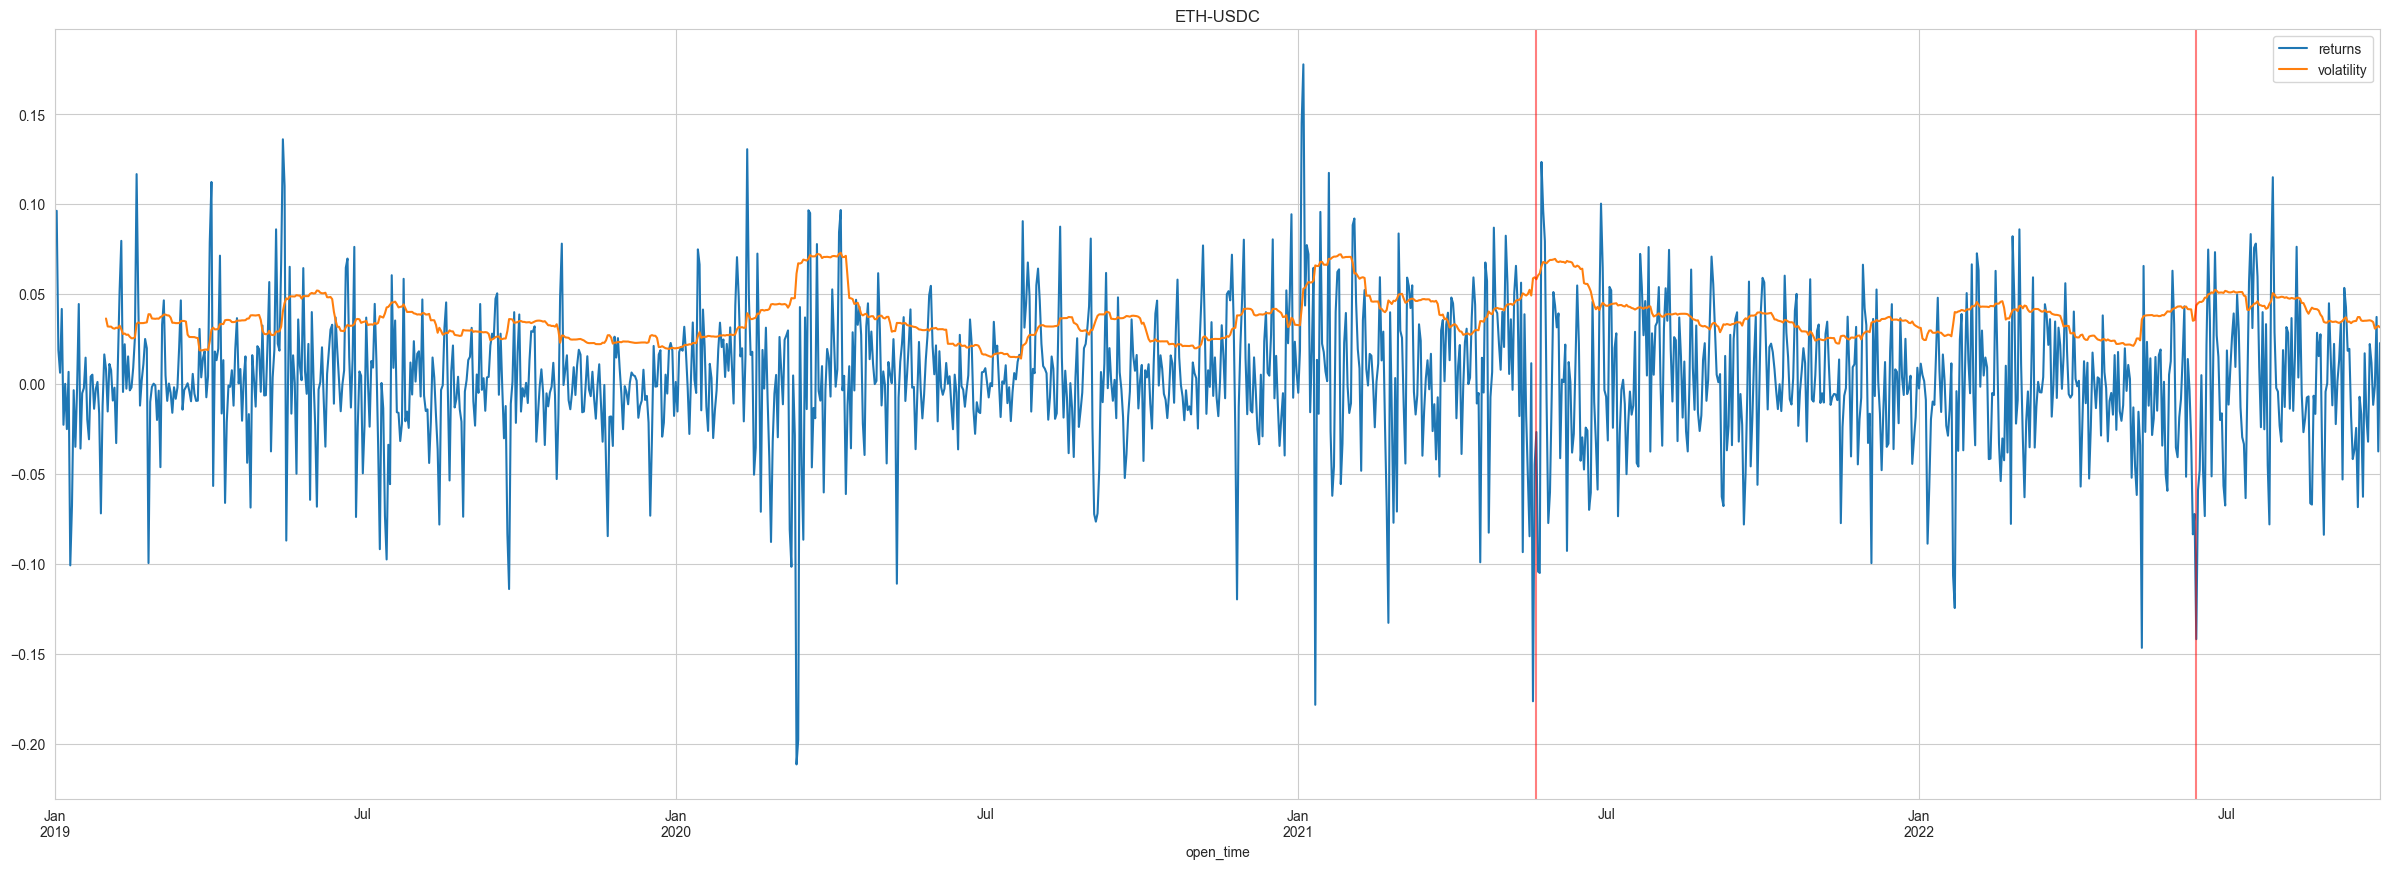

count    1338.000000
mean        0.036699
std         0.011825
min         0.014072
25%         0.027953
50%         0.035340
75%         0.042354
max         0.072912
Name: volatility, dtype: float64


In [3]:
df_ethusdc = pd.read_parquet("ETH-USDC.parquet")
df_ethusdc = resample_and_add_cols(df_ethusdc)
df_ethusdc[['returns', 'volatility']].plot(title='ETH-USDC')

# mark huge liquidation spikes (via https://dune.com/queries/81466/162640)
plt.axvline(pd.Timestamp('2021-05-21'),color='r', alpha=.5)
plt.axvline(pd.Timestamp('2022-06-13'),color='r', alpha=.5)

plt.show()

print(df_ethusdc['volatility'].describe())

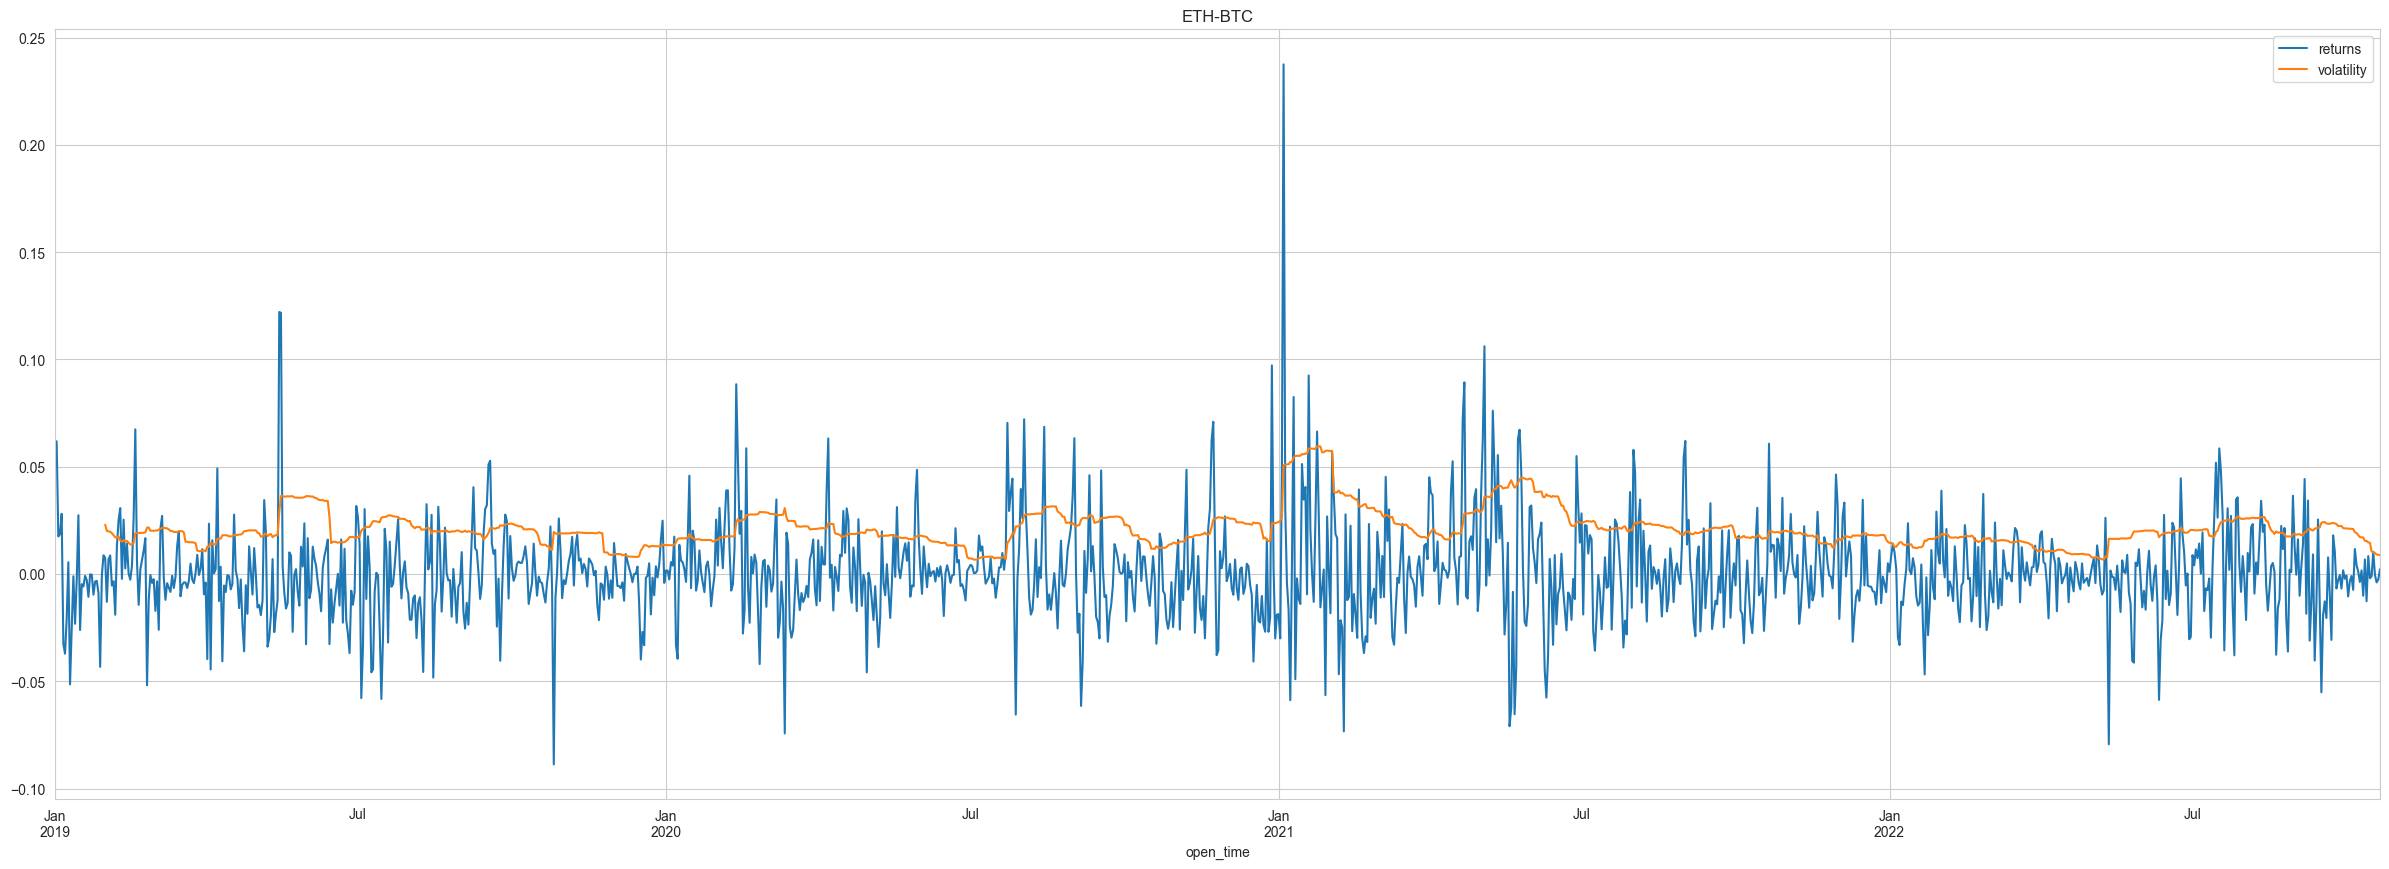

count    1360.000000
mean        0.021163
std         0.008598
min         0.006630
25%         0.016552
50%         0.019480
75%         0.023906
max         0.059497
Name: volatility, dtype: float64


In [4]:
df_ethbtc = pd.read_parquet("ETH-BTC.parquet")
df_ethbtc = resample_and_add_cols(df_ethbtc)
df_ethbtc[['returns', 'volatility']].plot(title='ETH-BTC')
plt.show()

print(df_ethbtc['volatility'].describe())

## 60-minute Volatility

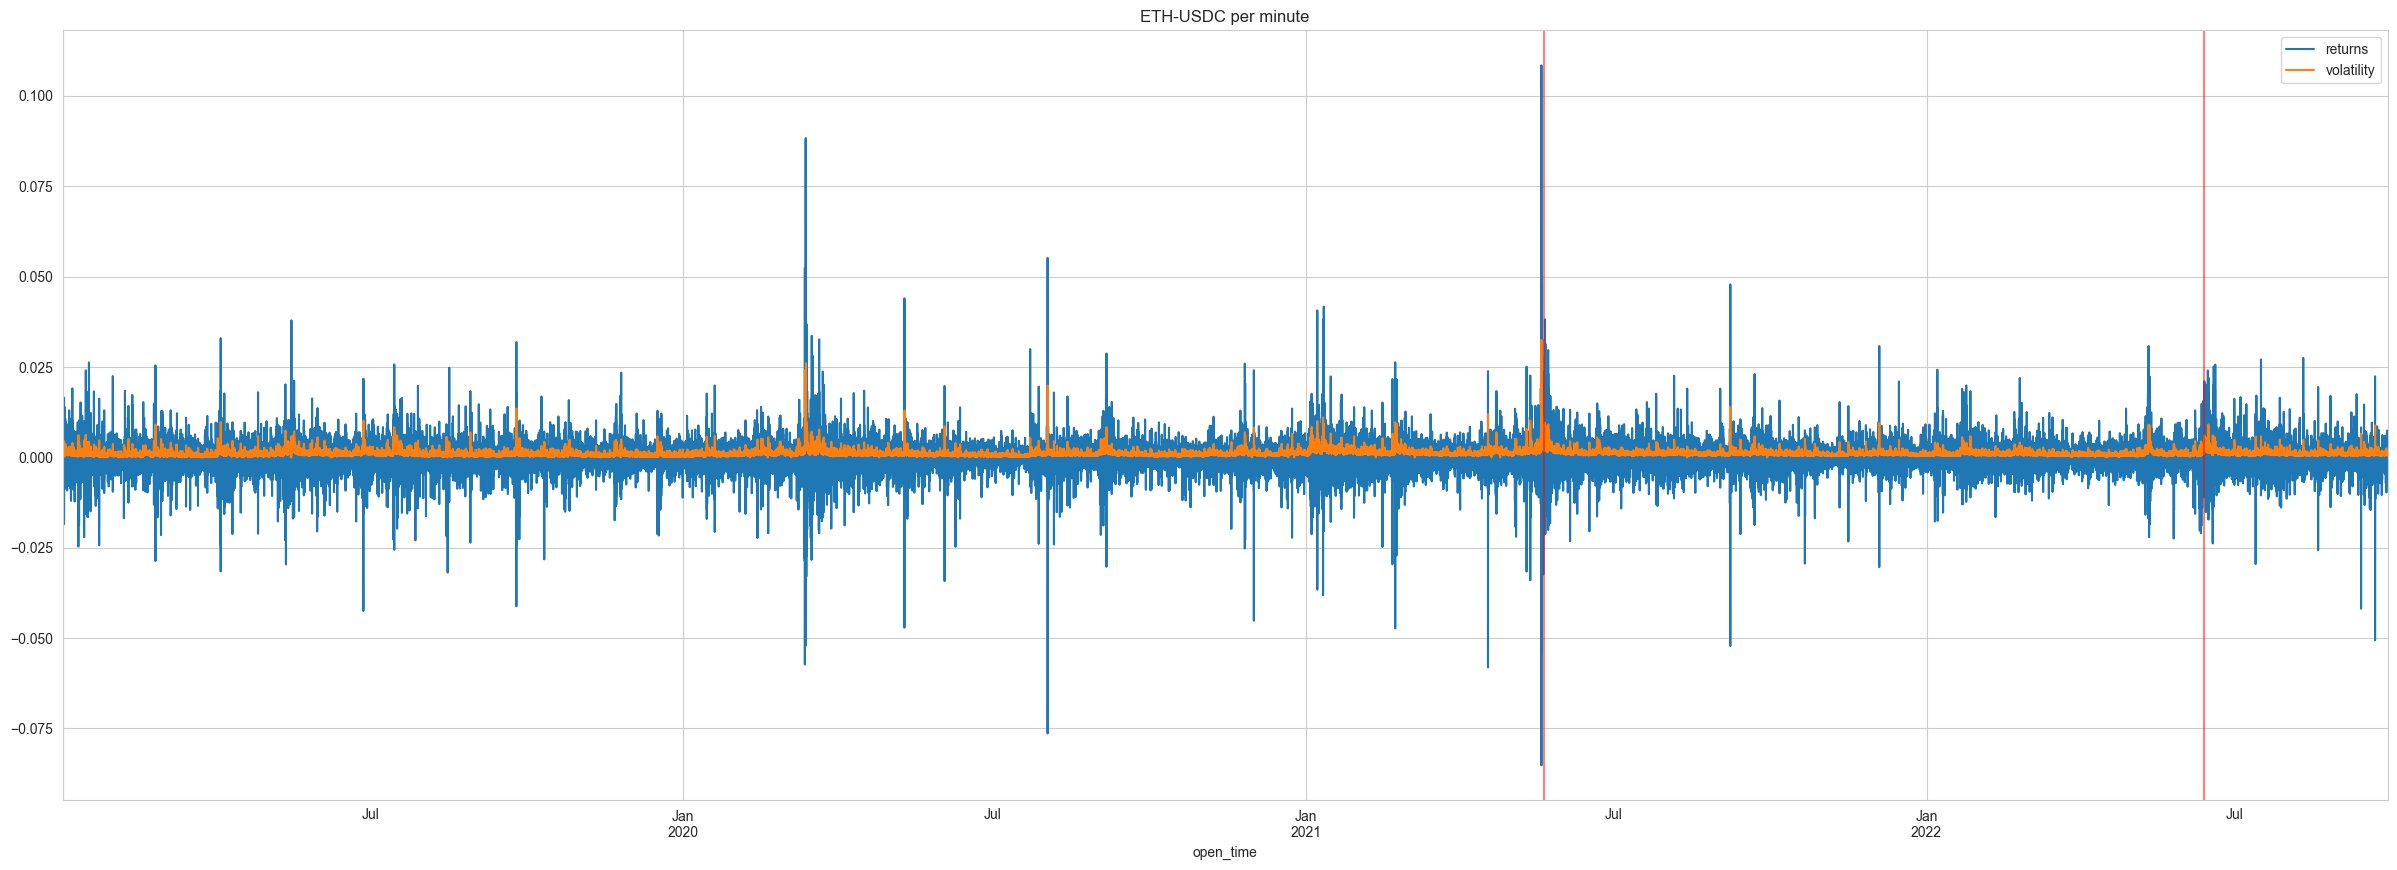

In [5]:
df_ethusdc_min = pd.read_parquet("ETH-USDC.parquet")
df_ethusdc_min = resample_and_add_cols(df_ethusdc_min, '1min', 60)
df_ethusdc_min[['returns', 'volatility']].plot(title='ETH-USDC per minute')

# mark huge liquidation spikes (via https://dune.com/queries/81466/162640)
plt.axvline(pd.Timestamp('2021-05-21'),color='r', alpha=.5)
plt.axvline(pd.Timestamp('2022-06-13'),color='r', alpha=.5)

plt.show()

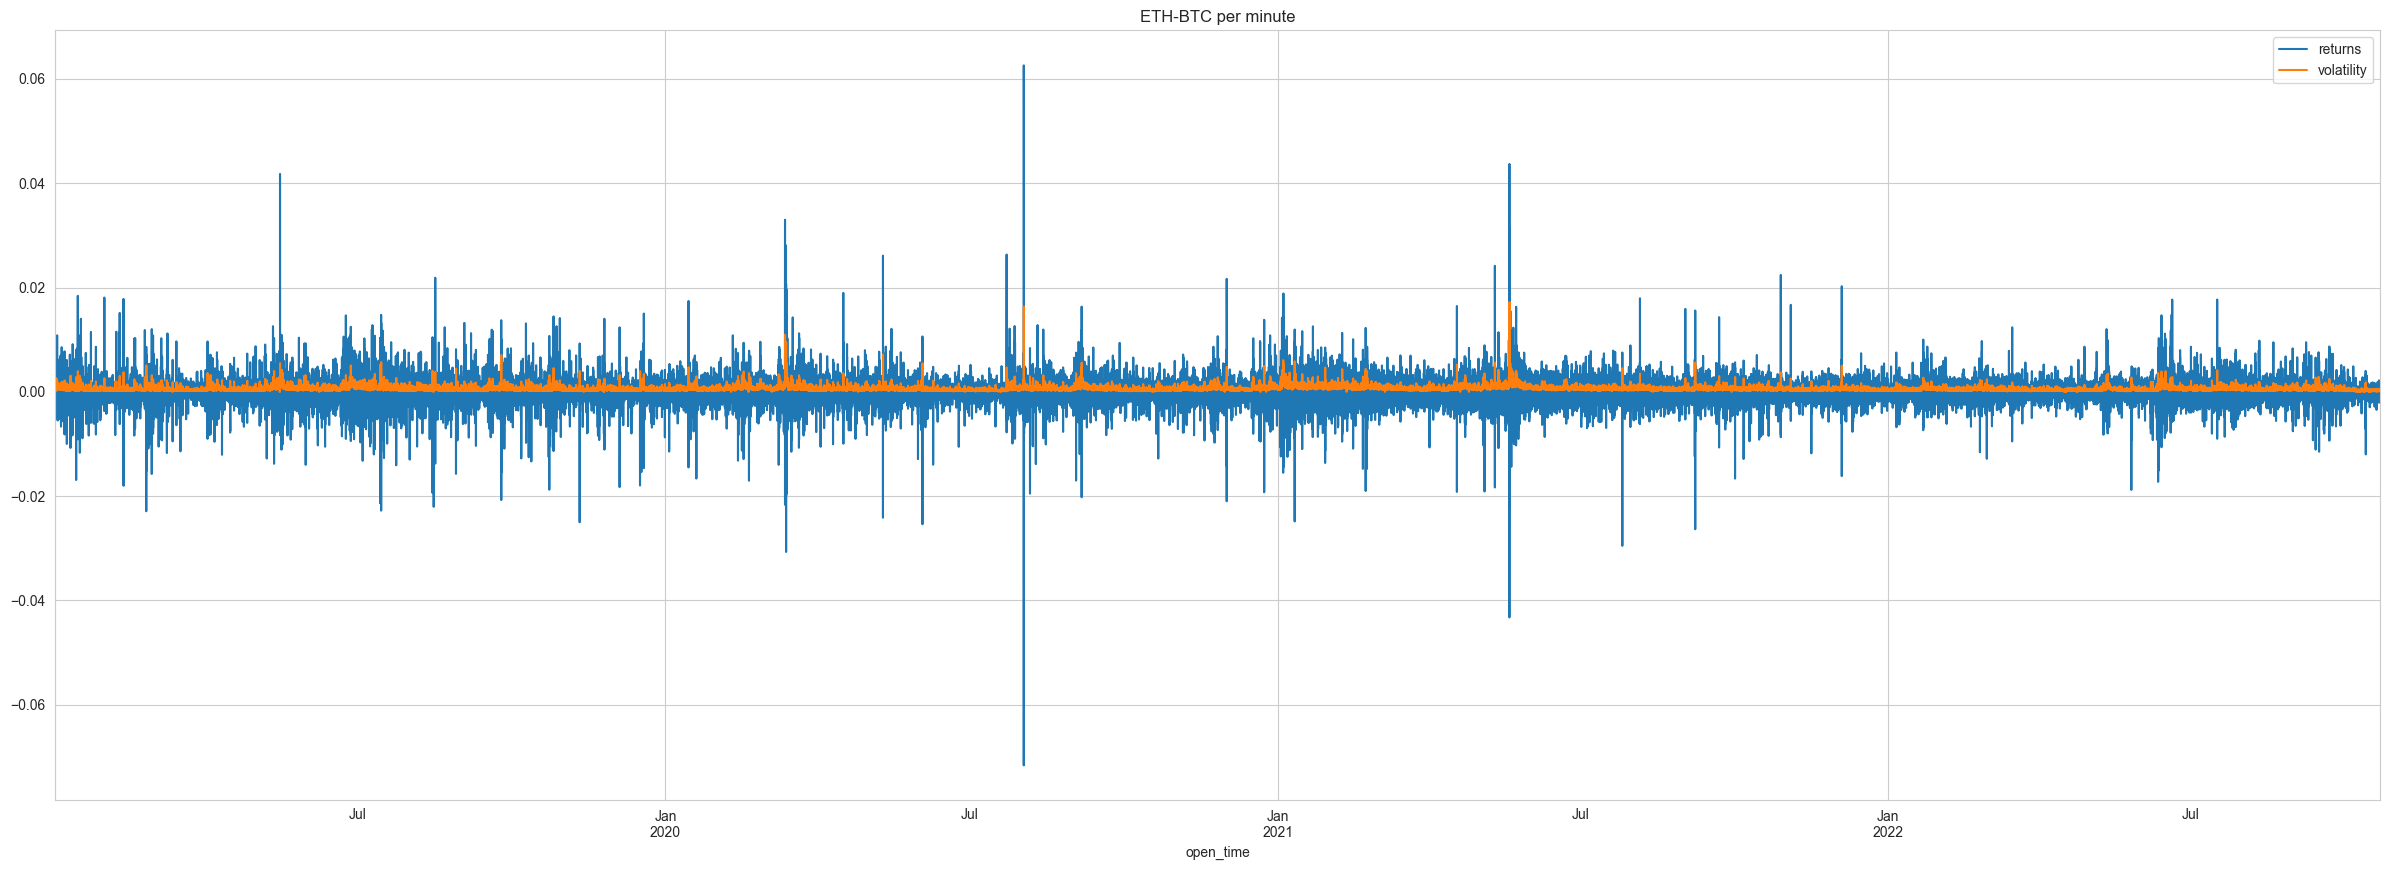

In [6]:
df_ethbtc_min = pd.read_parquet("ETH-BTC.parquet")
df_ethbtc_min = resample_and_add_cols(df_ethbtc_min, '1min', 60)
df_ethbtc_min[['returns', 'volatility']].plot(title='ETH-BTC per minute')
plt.show()

## Oracle Data (`0xAc559F25B1619171CbC396a50854A3240b6A4e99`)

In [7]:
df = pd.read_csv('btceth_oracle_data.csv')

# assert that no data points flunked
assert len (df[df['started_at'] != df['updated_at']]) == 0
assert len (df[df['round_id'] != df['answered_in_round']]) == 0

In [8]:
# reduce to simple time series
df = df.drop(['Unnamed: 0', 'updated_at', 'answered_in_round'], axis='columns')
df['started_at'] = pd.to_datetime(df['started_at'], unit="s", utc=True)
df['open'] = (df['answer'] / Decimal(10 ** 8)).astype(float)
df_ethbtc_oracle = df[['started_at', 'open']].set_index('started_at')

### ETH-BTC per day: Oracle vs Binance

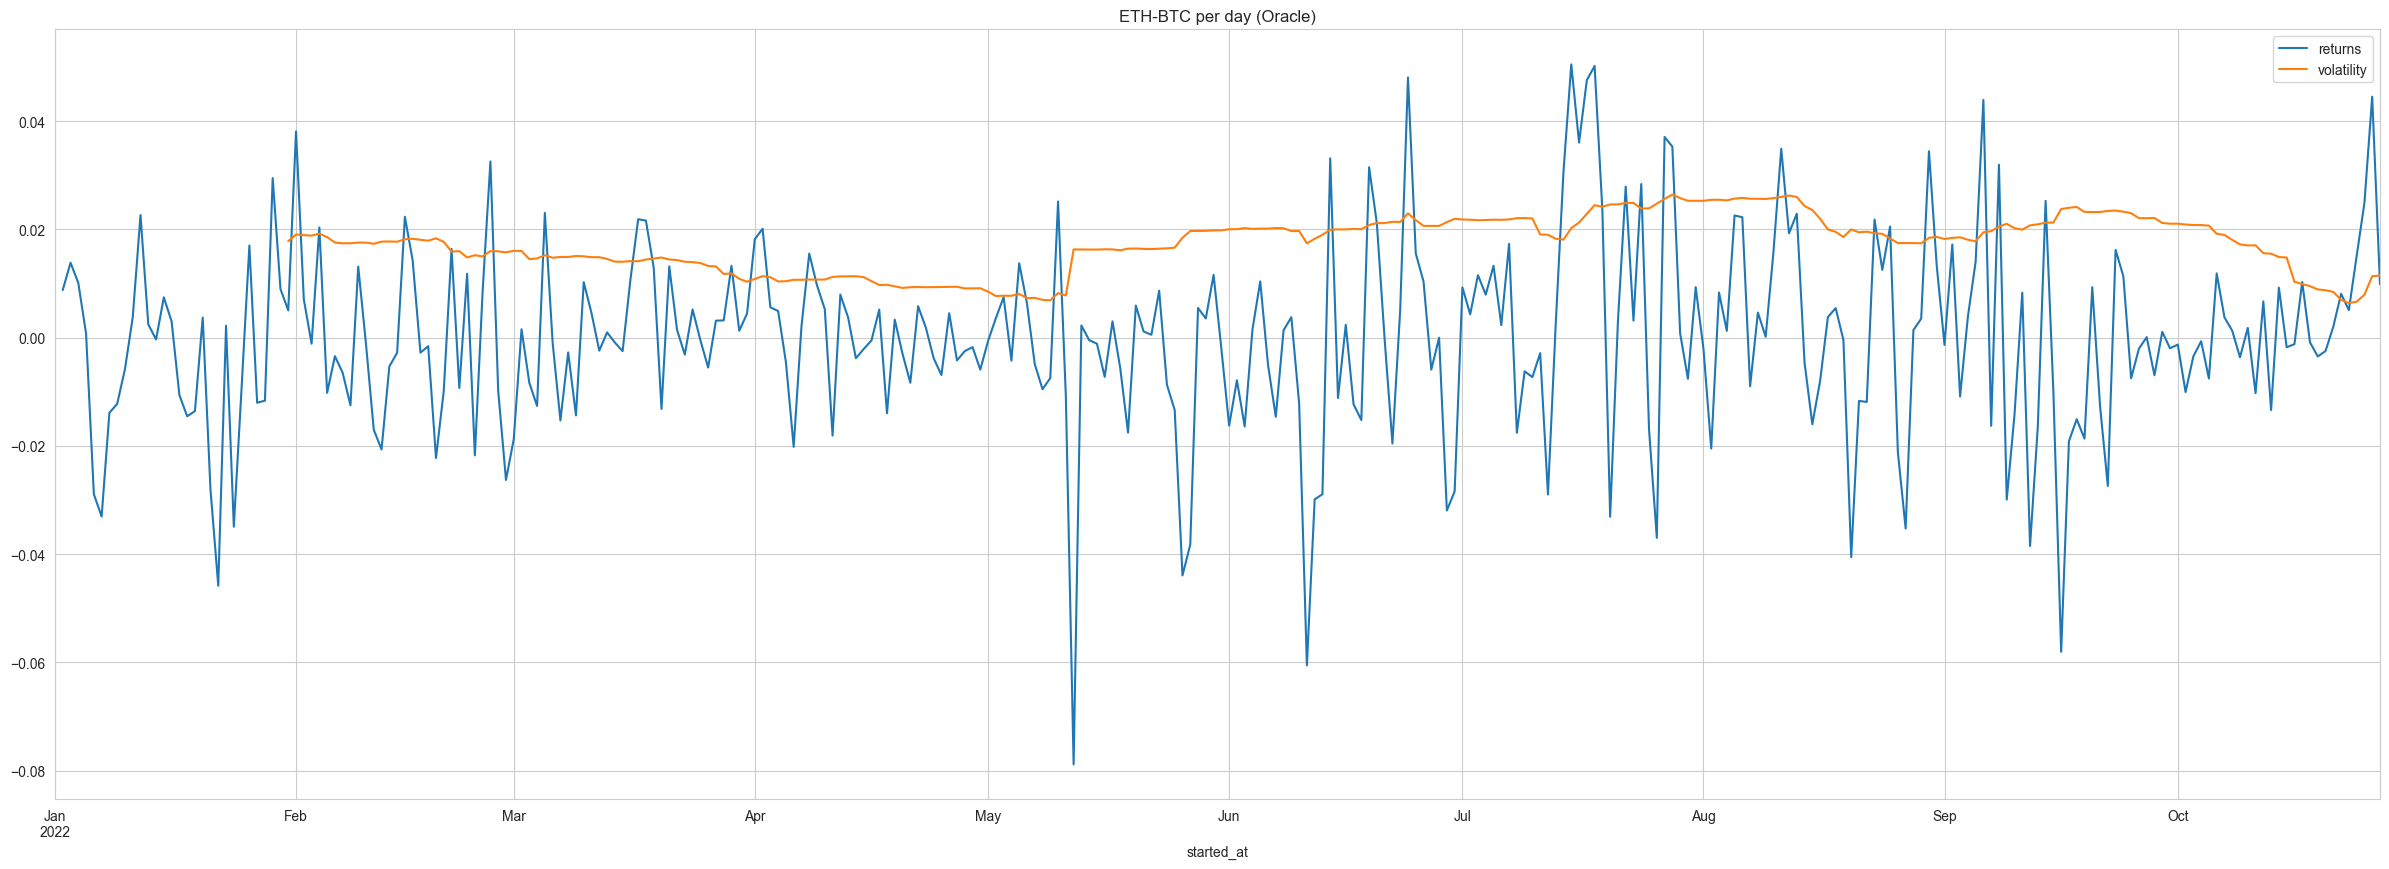

In [9]:
df = resample_and_add_cols(df_ethbtc_oracle, 'D', 30, start_year=2022)
df[['returns', 'volatility']].plot(title='ETH-BTC per day (Oracle)')
plt.show()

<AxesSubplot:title={'center':'ETH-BTC per day (Binance)'}, xlabel='open_time'>

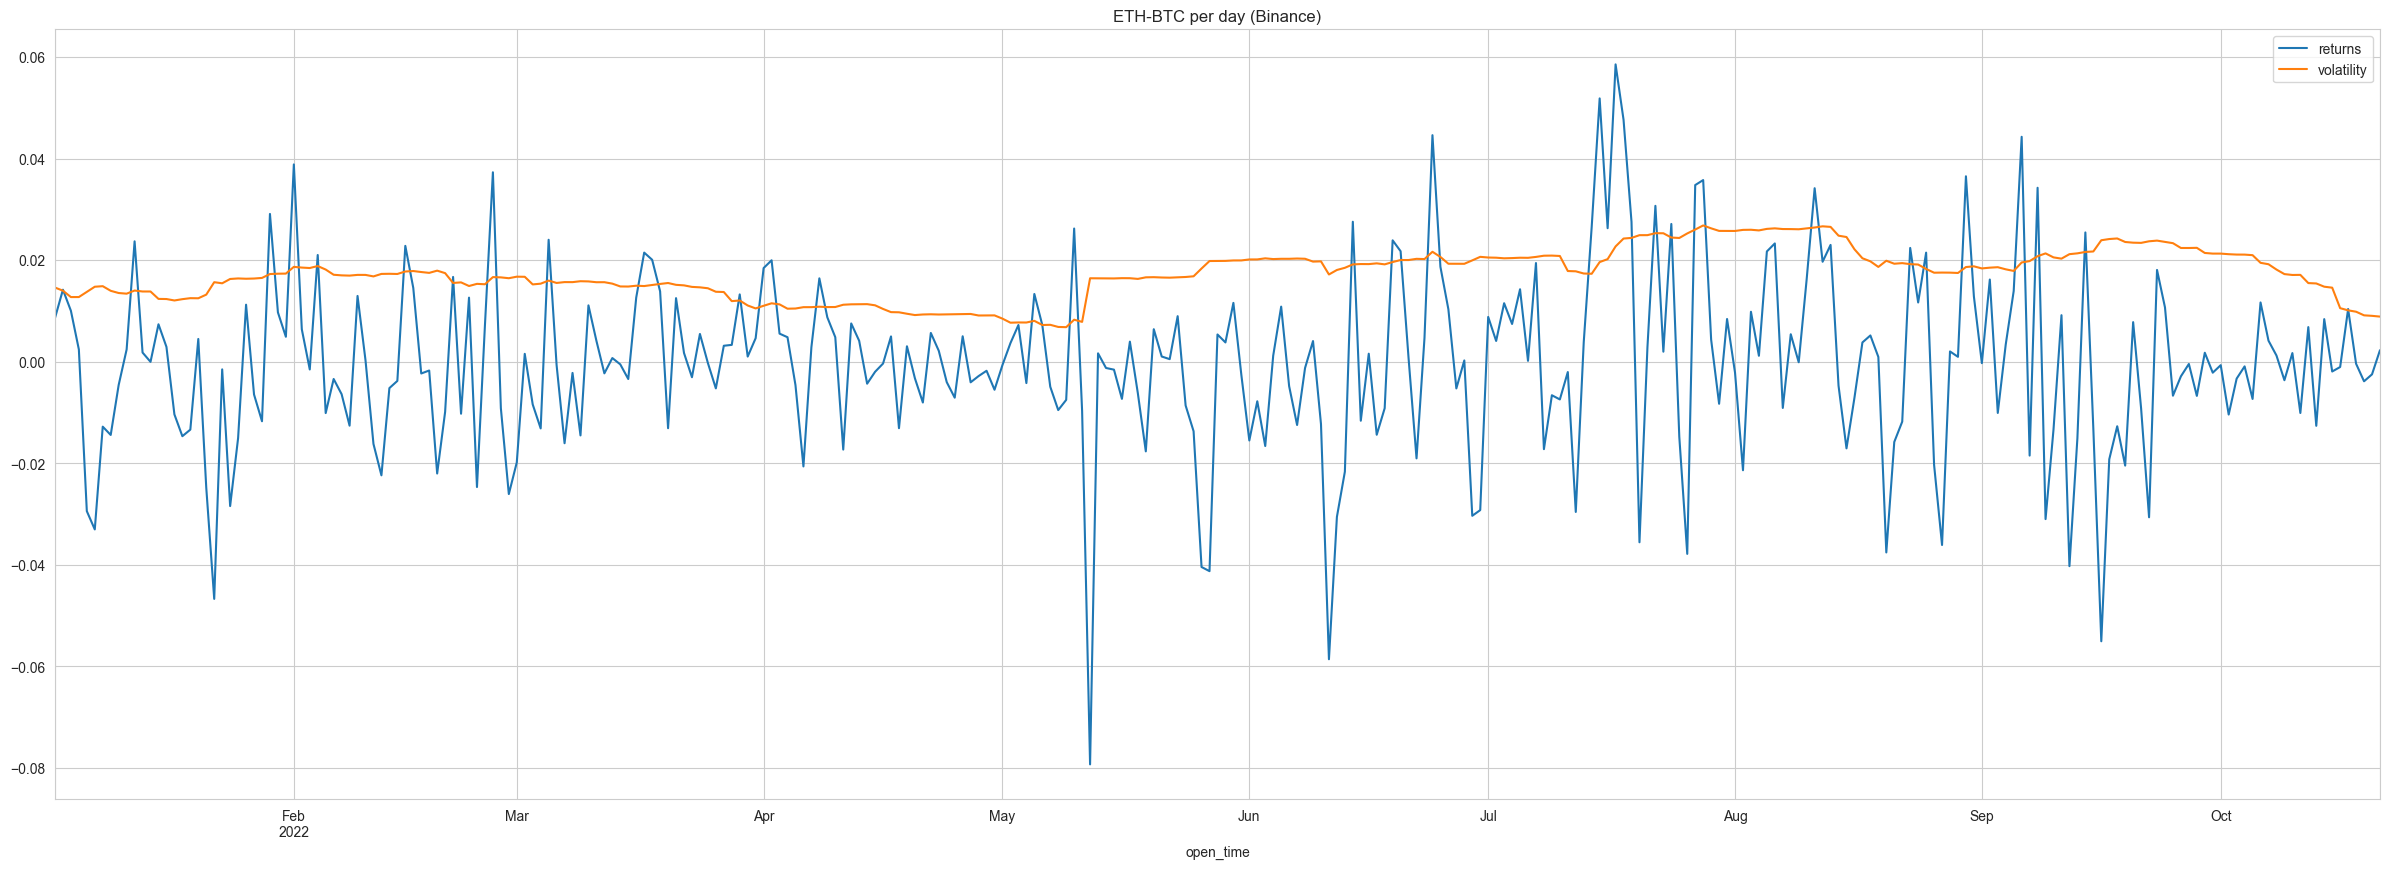

In [10]:
df_ethbtc[['returns', 'volatility']][df_ethbtc.index > '2022'].plot(title='ETH-BTC per day (Binance)')

### ETH-BTC per minute: Oracle vs Binance

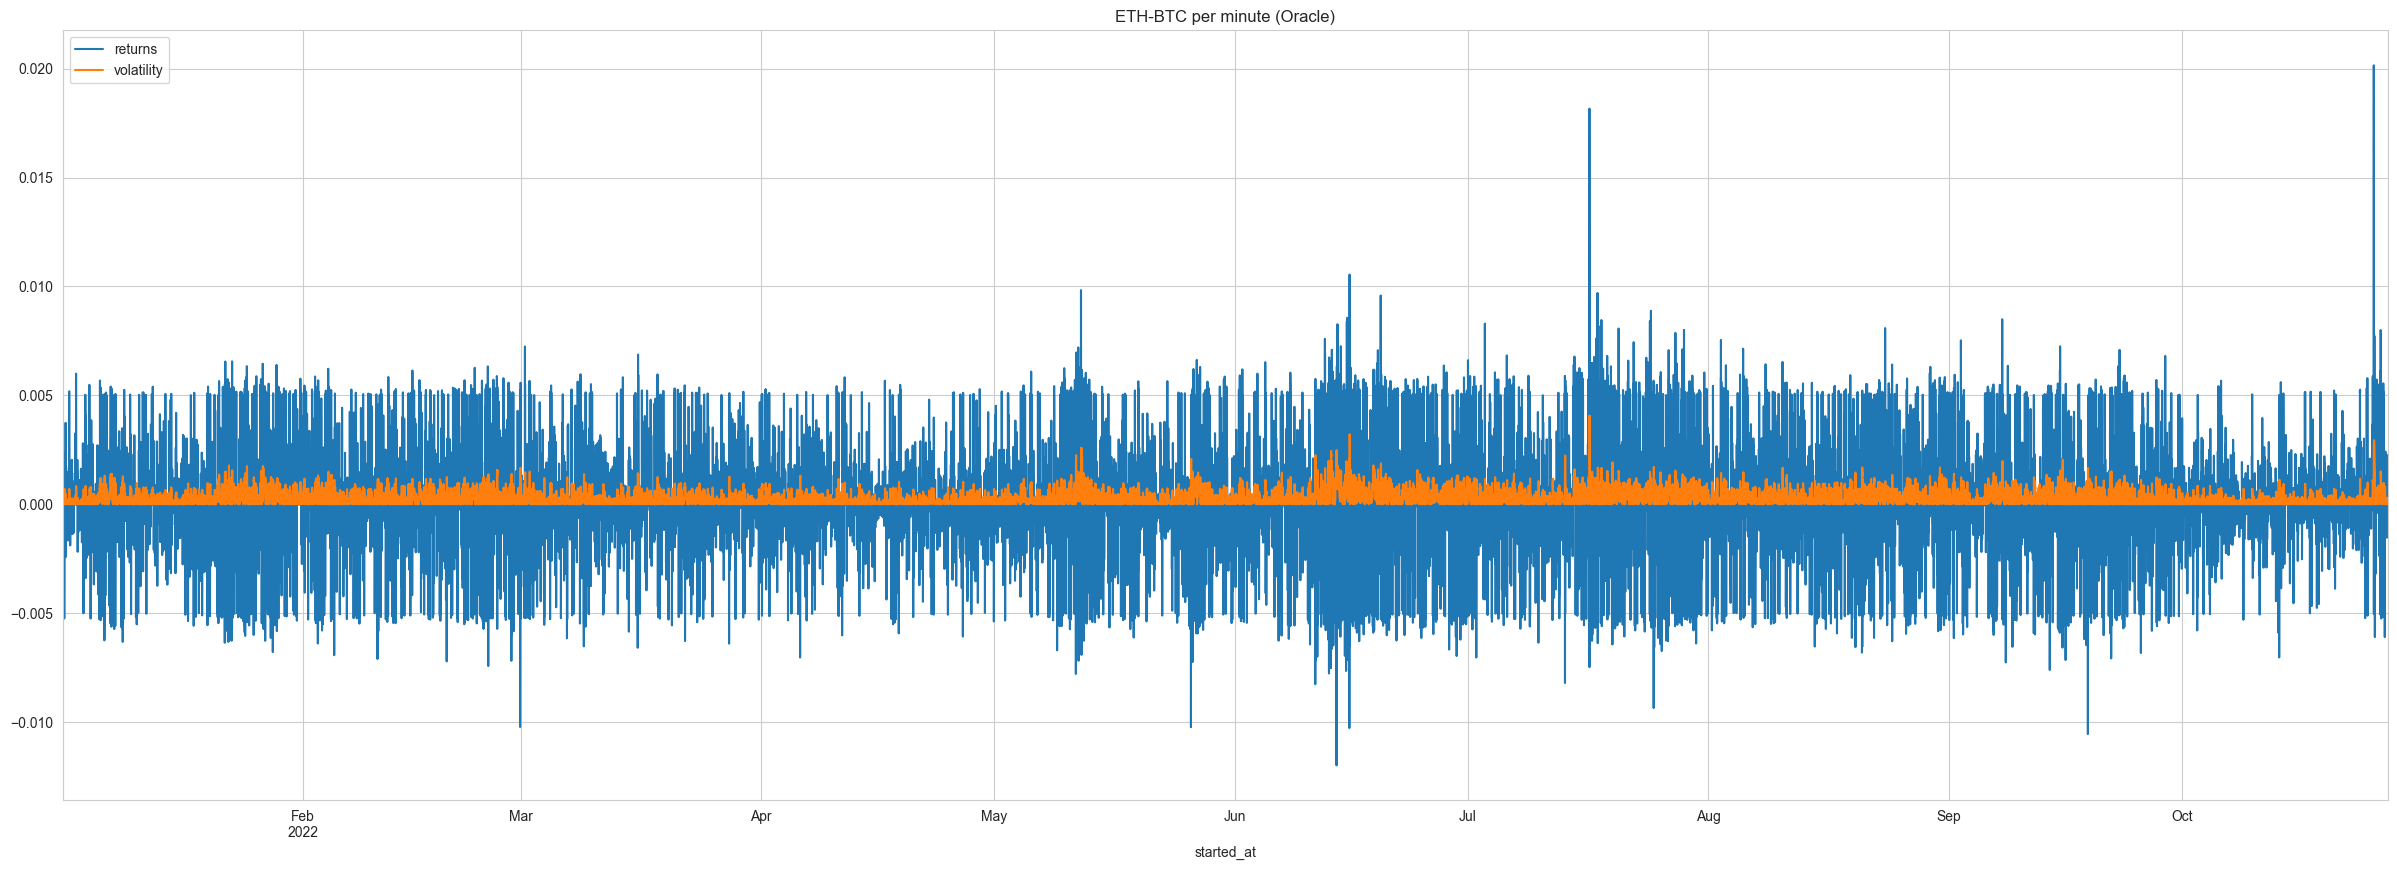

In [11]:
df = resample_and_add_cols(df_ethbtc_oracle, '1min', 60, start_year=2022)
df[['returns', 'volatility']].plot(title='ETH-BTC per minute (Oracle)')
plt.show()

<AxesSubplot:title={'center':'ETH-BTC per minute (Binance)'}, xlabel='open_time'>

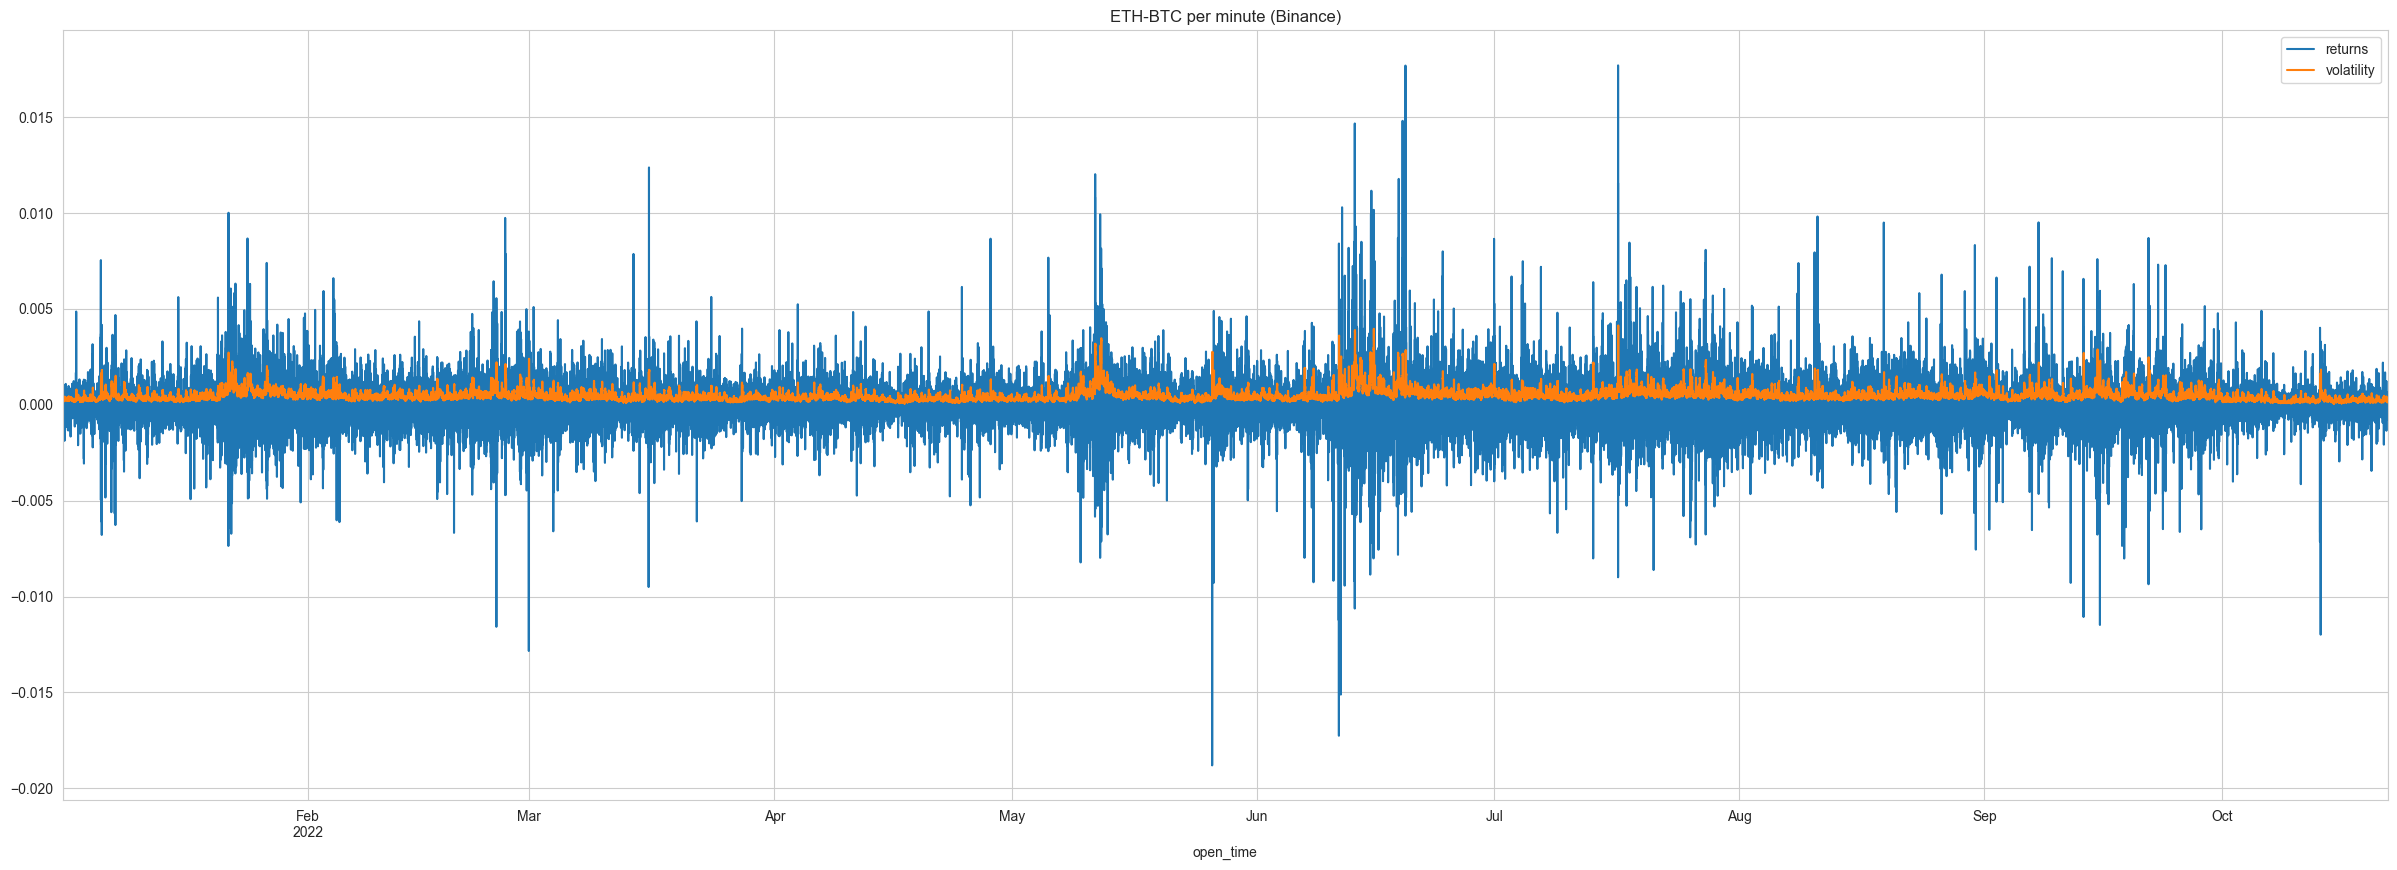

In [12]:
df_ethbtc_min[['returns', 'volatility']][df_ethbtc_min.index > '2022'].plot(title='ETH-BTC per minute (Binance)')